In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [62]:
data = pd.read_csv('/content/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [64]:
data.shape

(3276, 10)

In [65]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [66]:
# fill in missing values with the Mean of values above and below the cell

In [86]:
for x in data:
  data2[x] = data[x].fillna(data[x].mean())

In [68]:
data2.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000
mean,7.080795,196.366894,22014.465892,7.122222,333.765169,426.162942,14.286163,66.390004,3.967093,0.390229
std,1.470180,32.884445,8769.883803,1.583324,36.143031,80.800355,3.307963,15.768181,0.780304,0.487876
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277603,176.847379,15665.106976,6.127037,317.085373,365.729707,12.066072,56.643708,3.440020,0.000000
50%,7.080795,196.952875,20933.512750,7.130161,333.775777,421.879854,14.219303,66.396293,3.955091,0.000000
75%,7.870318,216.669594,27334.162293,8.115043,350.372842,481.754747,16.558126,76.651510,4.500432,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [69]:
data2.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [70]:
corr2 = data2.corr()

In [71]:
data2 = data2.dropna()

<Axes: >

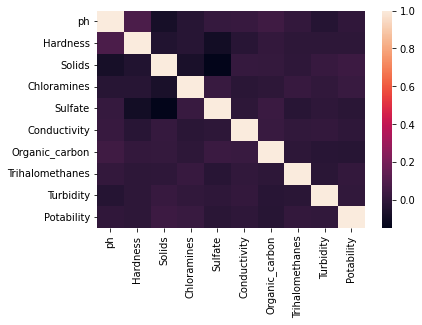

In [72]:
sns.heatmap(corr2)

In [73]:
X = data2.drop('Potability',axis = 1)
Y = data2.Potability

In [74]:
X.shape

(3275, 9)

In [75]:
Y.shape

(3275,)

In [87]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33,random_state = 89)

In [ ]:
# Logistic Regression

In [88]:
model = LogisticRegression()

In [90]:
model.fit(X_train,Y_train)

LogisticRegression()

In [91]:
X_train_prediction = model.predict(X_train)
train_accuracy = accuracy_score(X_train_prediction,Y_train)

In [92]:
X_test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction,Y_test)

In [93]:
print('Train Accuracy : ', train_accuracy)
print('Test Accuracy : ', test_accuracy)

Train Accuracy :  0.6089334548769371
Test Accuracy :  0.6123959296947271


In [94]:
#descision tree

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [108]:
c_entropy = DecisionTreeClassifier(criterion = 'entropy',random_state = 67,max_depth = 8 , min_samples_leaf = 20 )
c_entropy.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=20,
                       random_state=67)

In [109]:
predict =c_entropy.predict(X_test)
DT_acc= accuracy_score(Y_test,predict)
print('Decision Tree Accuracy Score : ',DT_acc)

Decision Tree Accuracy Score :  0.6382978723404256
